# Importando Bibliotecas

In [1]:
import pandas as pd
import statsmodels.api as sm
import scipy
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import warnings
import matplotlib.pyplot as plt
import numpy as np

In [2]:
warnings.filterwarnings('ignore')

# Carregando os Dados

In [3]:
cancer = datasets.load_breast_cancer()

In [4]:
features = pd.DataFrame(cancer.data, columns=cancer.feature_names)
target = pd.DataFrame(cancer.target, columns=['cancer'])

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, train_size=0.7, random_state=123)

# Feature Engineering

In [6]:
standard_scaler = StandardScaler()
X_train_standard = standard_scaler.fit_transform(X_train)
X_train_standard = pd.DataFrame(X_train_standard, columns=X_train.columns, index=X_train.index)
X_test_standard = standard_scaler.fit_transform(X_test)
X_test_standard = pd.DataFrame(X_test_standard, columns=X_test.columns, index=X_test.index)

# Feature Selection

In [7]:
rfecv_RFC = RFECV(estimator=LogisticRegression(), scoring='neg_mean_squared_error')
rfecv_RFC.fit(X_train,Y_train)

mask_RFC = rfecv_RFC.support_

cols_RFE= [not x for x in mask_RFC]
cols_RFE= X_train.loc[:,cols_RFE].columns.tolist()

cols_RFE

['mean texture',
 'mean area',
 'mean fractal dimension',
 'area error',
 'smoothness error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst perimeter',
 'worst area']

# Modelo

### Regressão Logística

In [8]:
X_train_standard = X_train_standard.loc[:, cols_RFE]

In [9]:
modelo = LogisticRegression()
modelo = modelo.fit(X_train_standard, Y_train)
Y_predict_train = modelo.predict(X_train_standard)

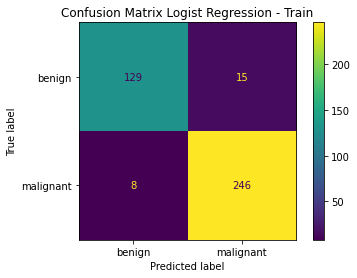

In [10]:
cm = metrics.confusion_matrix(Y_train, Y_predict_train)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['benign', 'malignant'])
disp.plot()
plt.title('Confusion Matrix Logist Regression - Train')
plt.show()

In [11]:
X_test_standard = X_test_standard.loc[:,cols_RFE]
Y_predict_test = modelo.predict(X_test_standard)

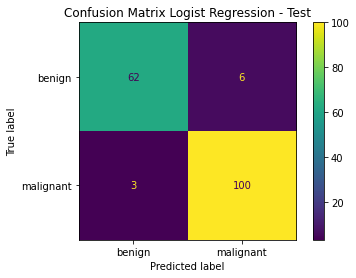

In [12]:
cm = metrics.confusion_matrix(Y_test, Y_predict_test)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['benign', 'malignant'])
disp.plot()
plt.title('Confusion Matrix Logist Regression - Test')
plt.show()

In [13]:
accuracy_train = round(metrics.accuracy_score(Y_train, Y_predict_train)*100,2)
accuracy_test = round(metrics.accuracy_score(Y_test, Y_predict_test)*100,2)

precision_train = round(metrics.precision_score(Y_train, Y_predict_train)*100,2)
precision_test = round(metrics.precision_score(Y_test, Y_predict_test)*100,2)

recall_train = round(metrics.recall_score(Y_train, Y_predict_train)*100,2)
recall_test = round(metrics.recall_score(Y_test, Y_predict_test)*100,2)

In [14]:
methods = []

methods.append({
    'method': 'Logistic Regression',
    'Train Accuracy': accuracy_train,
    'Train Precision': precision_train,
    'Train Recall': recall_train,
    'Test Accuracy': accuracy_test,
    'Test Precision': precision_test,
    'Test Recall': recall_test
})

#### Curva ROC e AUC

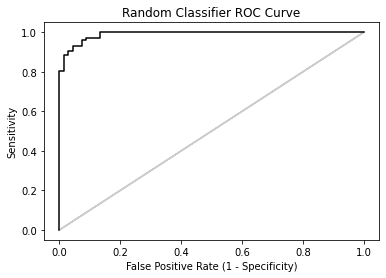

In [15]:
modelo_probabilidades = modelo.predict_proba(X_test_standard)[:, 1]
false_positive_rate_values, sensitivity_values, thresholds = metrics.roc_curve(Y_test, modelo_probabilidades, pos_label=1)

plt.step(false_positive_rate_values, sensitivity_values, color='black', where='post')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('Sensitivity')
plt.title('ROC Curve')

plt.step(np.arange(0, 1, 0.001), np.arange(0, 1, 0.001), color='black', alpha=0.2,
         where='post')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('Sensitivity')
plt.title('Random Classifier ROC Curve')

plt.show()

In [16]:
AUC = metrics.roc_auc_score(Y_test, modelo_probabilidades)
AUC

0.9901484865790977

### KNN

In [17]:
X_train_standard = X_train_standard.loc[:, cols_RFE]

In [18]:
modelo_knn = KNeighborsClassifier()
modelo_knn = modelo_knn.fit(X_train_standard, Y_train)
Y_predict_train_knn = modelo_knn.predict(X_train_standard)

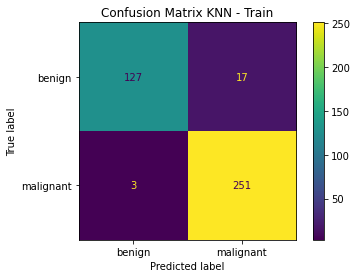

In [19]:
cm_knn = metrics.confusion_matrix(Y_train, Y_predict_train_knn)
disp_knn = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=['benign', 'malignant'])
disp_knn.plot()
plt.title('Confusion Matrix KNN - Train')
plt.show()

In [20]:
X_test_standard = X_test_standard.loc[:,cols_RFE]
Y_predict_test_knn = modelo_knn.predict(X_test_standard)

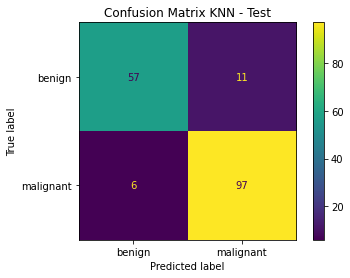

In [21]:
cm_knn = metrics.confusion_matrix(Y_test, Y_predict_test_knn)
disp_knn = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=['benign', 'malignant'])
disp_knn.plot()
plt.title('Confusion Matrix KNN - Test')
plt.show()

In [22]:
accuracy_train = round(metrics.accuracy_score(Y_train, Y_predict_train_knn)*100,2)
accuracy_test = round(metrics.accuracy_score(Y_test, Y_predict_test_knn)*100,2)

precision_train = round(metrics.precision_score(Y_train, Y_predict_train_knn)*100,2)
precision_test = round(metrics.precision_score(Y_test, Y_predict_test_knn)*100,2)

recall_train = round(metrics.recall_score(Y_train, Y_predict_train_knn)*100,2)
recall_test = round(metrics.recall_score(Y_test, Y_predict_test_knn)*100,2)

In [23]:
methods.append({
    'method': 'KNN',
    'Train Accuracy': accuracy_train,
    'Train Precision': precision_train,
    'Train Recall': recall_train,
    'Test Accuracy': accuracy_test,
    'Test Precision': precision_test,
    'Test Recall': recall_test
})

#### Curva ROC e AUC

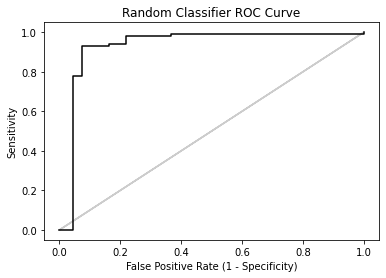

In [24]:
modelo_probabilidades = modelo_knn.predict_proba(X_test_standard)[:, 1]
false_positive_rate_values, sensitivity_values, thresholds = metrics.roc_curve(Y_test, modelo_probabilidades, pos_label=1)

plt.step(false_positive_rate_values, sensitivity_values, color='black', where='post')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('Sensitivity')
plt.title('ROC Curve')

plt.step(np.arange(0, 1, 0.001), np.arange(0, 1, 0.001), color='black', alpha=0.2,
         where='post')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('Sensitivity')
plt.title('Random Classifier ROC Curve')

plt.show()

In [25]:
AUC = metrics.roc_auc_score(Y_test, modelo_probabilidades)
AUC

0.9556681896059395

# Conclusão

In [26]:
conclusion = pd.DataFrame(methods)
conclusion

,method,Train Accuracy,Train Precision,Train Recall,Test Accuracy,Test Precision,Test Recall
0,Logistic Regression,94.22,94.25,96.85,94.74,94.34,97.09
1,KNN,94.97,93.66,98.82,90.06,89.81,94.17


Vamos pensar no problema que estamos tentando resolver. Queremos um algoritmo que diga se as pessoas têm ou não câncer de acordo com as especificidades de seus tumores (lembrando que um tumor pode ser benigno ou maligno).

Dito isso, o que seria melhor? Dizer a um paciente que ele não tem câncer quando ele tem ou dizer a um paciente que ele tem câncer quando ele não tem?

Falando pela minha própria opinião, eu preferiria receber a noticia de que tenho câncer e depois revogar o diagnóstico com uma biópsia, pois assim eu posso me tratar ainda no início da doença.

Bom, a frase acima já nos diz qual métrica é mais importante para nós. É o **Recall**, pois o Recall é a taxa de identificação, que quer dizer que, do total de positivos, quantos foram identificados? 

In [27]:
conclusion = conclusion.sort_values('Test Recall', ascending=False)
conclusion

,method,Train Accuracy,Train Precision,Train Recall,Test Accuracy,Test Precision,Test Recall
0,Logistic Regression,94.22,94.25,96.85,94.74,94.34,97.09
1,KNN,94.97,93.66,98.82,90.06,89.81,94.17


In [28]:
winner = conclusion['method'][0]
recall = conclusion['Test Recall'][0]
print(f'O método vencedor foi o {winner} com um recall de {recall}%')

O método vencedor foi o Logistic Regression com um recall de 97.09%


A métrica AUC **confirma** esse resultado (o AUC Score da Regressão Logística foi maior).